# Instalación de las librerias necesarias

In [154]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn.model_selection import train_test_split


## Revisión de la data:
Se uso la información del siguiente repositorio: https://www.kaggle.com/datasets/avnishnish/mnist-original/data

In [196]:
mnist = loadmat('Data_Ejercicio_3/mnist-original.mat')
mnist_data = mnist["data"].T
mnist_label = mnist["label"][0]

In [197]:
# Normalizar los datos (de 0 a 255 a valores entre 0 y 1)
mnist_data = mnist_data / 255.0

# Convertir las etiquetas a formato one-hot (10 clases)
mnist_label_onehot = to_categorical(mnist_label, 10)

In [198]:
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(mnist_data, mnist_label_onehot, test_size=0.2, random_state=42)

## Programación del Modelo
* Se considera un verdo de 784
* 128 neuronas y activación ReLU
* Capa de salida por 10 neuronas y activación softmax


In [209]:
# Definir el modelo
model = Sequential()

model.add(Flatten(input_shape=(784,)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_8 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

## Compilación y Entrenamiento del Modelo

In [210]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/20
875/875 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8467 - loss: 0.5409 - val_accuracy: 0.9490 - val_loss: 0.1773
Epoch 2/20
875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9582 - loss: 0.1443 - val_accuracy: 0.9637 - val_loss: 0.1255
Epoch 3/20
875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9714 - loss: 0.0966 - val_accuracy: 0.9680 - val_loss: 0.1082
Epoch 4/20
875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9796 - loss: 0.0710 - val_accuracy: 0.9711 - val_loss: 0.0994
Epoch 5/20
875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9825 - loss: 0.0585 - val_accuracy: 0.9719 - val_loss: 0.0913
Epoch 6/20
875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9868 - loss: 0.0437 - val_accuracy: 0.9754 - val_loss: 0.0860
Epoch 7/20
875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9895 - loss: 0.0363 - val_accuracy: 0.9741 - val_loss: 0.0816
Epoch 8/20
875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9921 - loss: 0.0277 - val_accuracy: 0.

In [211]:
# Evaluar el modelo en los datos de prueba
test_loss, test_acc = model.evaluate(X_test, y_test)

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9793 - loss: 0.0942


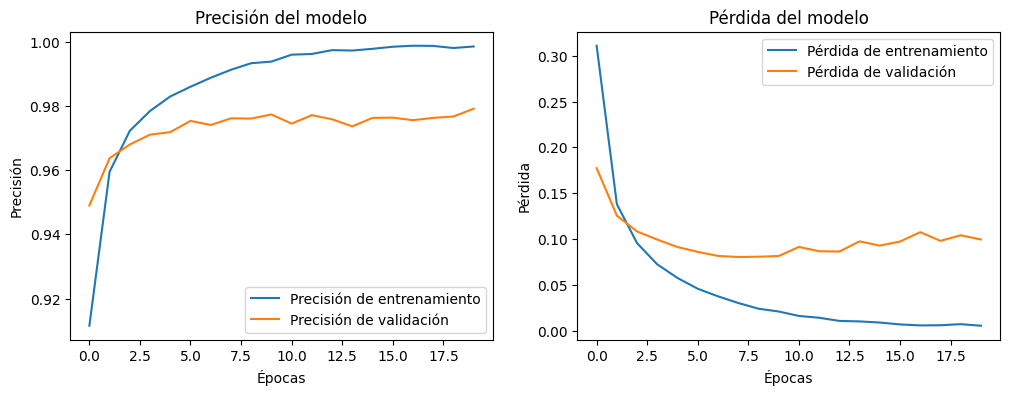

In [212]:
# Graficar la precisión y la pérdida durante el entrenamiento
plt.figure(figsize=(12, 4))

# Precisión
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.title('Precisión del modelo')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

# Pérdida
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida del modelo')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()


* Como se muestra en la Precisión del modelo, se ve una buena buena precisión dentro de las epicas
* Como se muestra en la perdida del modelo, después de la época 2 se muestra una tendencia a 0 

In [213]:
# Hacer predicciones en el conjunto de prueba
predictions = model.predict(X_test)

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


### Revisión de Resultados

In [214]:
# Mostrar las primeras 5 predicciones y las etiquetas reales
int(np.argmax(y_test[1]))

8

In [215]:
int(np.argmax(predictions[1]))

8

In [216]:
int(np.argmax(y_test[2]))

6

In [217]:
int(np.argmax(predictions[2]))

6

1. Como se vieron en las pruebas 1 a 1, el modelo de red neuronal puede determinar el número de la foto
2. El modelo tiene un accuracy: 0.9793 lo que indica que es un modelo muy bueno para la determinación y predicción de las imágenes y números 
3. Una posible mejora sería probar con otros modelos de activación como "Sigmoid" o "Tanh"